In [1]:
import rasterio as rio
from rasterio.plot import plotting_extent
import rasterio.plot
import numpy as np
from topolib.subsetDat import subsetBBox;
from topolib import gda_lib;
from pyproj import Proj, transform
from icepyx import icesat2data as ipd
%matplotlib inline
import matplotlib.pyplot as plt 
import sys
import glob
import pdal
import getpass

In [2]:
indir = '/home/jovyan/shared/data-aragon/ATL03_CA/'
outdir = '/home/jovyan/shared/data-aragon/ATL03_CA/tif/'

In [3]:
#get .laz files
lazfiles = glob.glob(indir+'*laz')
lazfiles

['/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt2l_xyz_conf.laz',
 '/home/jovyan/shared/data-aragon/ATL03_CA/ATL03_CA_TE_gtlr.laz',
 '/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt2r_xyz_conf.laz',
 '/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt3l_xyz_conf.laz',
 '/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt1r_xyz_conf.laz',
 '/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt1l_xyz_conf.laz',
 '/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt3r_xyz_conf.laz']

In [4]:
#get .h5 files 
h5files = glob.glob(indir+'*h5')
h5files

['/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt2r_xyz_conf.h5',
 '/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt2l_xyz_conf.h5',
 '/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt3r_xyz_conf.h5',
 '/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt1l_xyz_conf.h5',
 '/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt1r_xyz_conf.h5',
 '/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01.h5',
 '/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt3l_xyz_conf.h5']

# Visualize the dem .tif 

In [3]:
raster_path = '/home/jovyan/shared/data-aragon/ASO_3M_PCDTM_USCATE_20191010_20191010.tif'
ds = rio.open(raster_path)
ASOdem = ds.read(1)
ASOdem = np.ma.masked_equal(ASOdem,gda_lib.get_ndv(ds))
xmin,ymin,xmax,ymax = ds.bounds
ds.crs

CRS.from_epsg(32611)

In [123]:
[xmin,ymin,xmax,ymax] = subsetBBox(raster_path,ds.crs,'epsg:7912')
xmin,ymin,xmax,ymax

(242715.0, 307584.0, 4234848.0, 4178889.0)

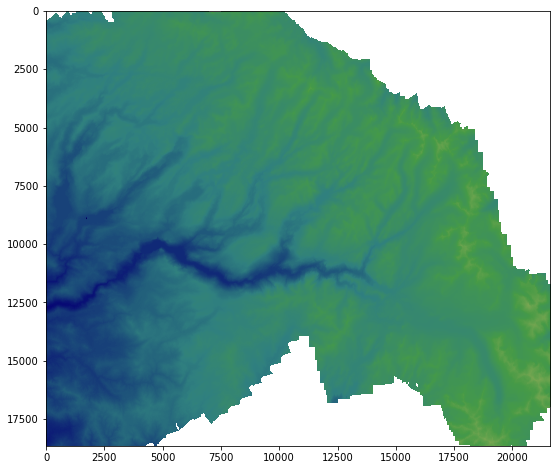

In [4]:
fig,ax = plt.subplots(figsize=(10,8))
im = rio.plot.show(ASOdem, ax=ax,cmap='gist_earth')

# Edit laz_to_tif.json to change pdal function

In [81]:
! pdal info /home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt1r_xyz_conf.laz -p 2000

{
  "file_size": 2238241,
  "filename": "/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt1r_xyz_conf.laz",
  "now": "2020-06-18T04:38:49+0000",
  "pdal_version": "2.1.0 (git-version: 4676a9)",
  "points":
  {
    "point":
    {
      "Blue": 0,
      "Classification": 0,
      "EdgeOfFlightLine": 0,
      "GpsTime": 0,
      "Green": 0,
      "Intensity": 0,
      "NumberOfReturns": 1,
      "PointId": 2000,
      "PointSourceId": 0,
      "Red": 0,
      "ReturnNumber": 1,
      "ScanAngleRank": 0,
      "ScanDirectionFlag": 0,
      "UserData": 0,
      "X": -119.43,
      "Y": 38.24,
      "Z": 3293.67
    }
  },
  "reader": "readers.las"
}


In [80]:
! pdal info /home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt1r_xyz_conf.laz --summary

{
  "file_size": 2238241,
  "filename": "/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt1r_xyz_conf.laz",
  "now": "2020-06-18T04:38:45+0000",
  "pdal_version": "2.1.0 (git-version: 4676a9)",
  "reader": "readers.las",
  "summary":
  {
    "bounds":
    {
      "maxx": -119.4250269,
      "maxy": 38.24107323,
      "maxz": 3851.657471,
      "minx": -119.4887992,
      "miny": 37.7210657,
      "minz": 1233.237549
    },
    "dimensions": "X, Y, Z, Intensity, ReturnNumber, NumberOfReturns, ScanDirectionFlag, EdgeOfFlightLine, Classification, ScanAngleRank, UserData, PointSourceId, GpsTime, Red, Green, Blue",
    "num_points": 1100066
  }
}


In [ ]:
'bounds':'(['+str(xmin)+','+str(xmax)+'],['+str(ymin)+','+str(ymax)+'])'
data['pipeline'].append({
    'type':"filters.range",
    'limits':"UserData[0:4]"
})

In [109]:
import json

bounds = '(['+str(xmin)+','+str(xmax)+'],['+str(ymin)+','+str(ymax)+'])'

data = {}
data['pipeline'] = []
data['pipeline'].append({
    'type':"readers.las",
    'override_srs':"EPSG:7912"
})
data['pipeline'].append({
    'type':"filters.reprojection",
    'in_srs':"EPSG:7912",
    'out_srs':"EPSG:32611"
})
data['pipeline'].append({
    'type':"filters.range",
    'limits':"UserData[0:4]"
})
data['pipeline'].append({
    'type':"writers.gdal",
    'gdaldriver':"GTiff",
    'gdalopts':"TILED=YES,COMPRESS=LZW,BIGTIFF=YES,NUM_THREADS=ALL_CPUS,SPARSE_OK=TRUE",
    'data_type':"float32",
    'resolution':10,
    'radius':1000
})

with open('laz_to_tiff2.json', 'w') as outfile:
    json.dump(data, outfile)

# Use PDAL pipeline to convert from [LAZ to GeoTiff](https://github.com/ICESAT-2HackWeek/SeasonalSnow/tree/master/contributors/jomey)


In [110]:
! pdal pipeline ~/SeasonalSnow/contributors/Nina/laz_to_tiff2.json --readers.las.filename=/home/jovyan/shared/data-aragon/ATL03_CA/processed_ATL03_20191008182255_01810506_003_01_gt1r_xyz_conf.laz --writers.gdal.filename=/home/jovyan/shared/data-aragon/ATL03_CA/tif/processed_ATL03_20191008182255_01810506_003_01_gt1r_xyz_conf.tif

# Visualize the .tif 
In not otherwise specified, there are 6 bands in the output .tif - in the following order:

“min”, “max”, “mean”, “idw”, “count”, “stdev” and “all”

In [74]:
!gdalinfo $outdir/processed_ATL03_20191008182255_01810506_003_01_gt1r_xyz_conf.tif -stats

Driver: GTiff/GeoTIFF
Files: /home/jovyan/shared/data-aragon/ATL03_CA/tif//processed_ATL03_20191008182255_01810506_003_01_gt1r_xyz_conf.tif
Size is 69, 577
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 11N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 11N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-117,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False 

In [4]:
ds = rio.open(outdir+'processed_ATL03_20191008182255_01810506_003_01_gt1r_xyz_conf.tif')
dem = ds.read(3)
dem = np.ma.masked_equal(dem,-9999)
xmin,ymin,xmax,ymax = ds.bounds
ds.crs

CRS.from_epsg(32611)

In [112]:
dem

masked_array(
  data=[[--, --, --, ..., 2886.708984375, 2886.708984375,
         3012.270751953125],
        [--, --, --, ..., 2886.708984375, 2886.708984375, 2886.708984375],
        [--, --, --, ..., 2886.708984375, 2886.708984375, 2886.708984375],
        ...,
        [2305.3173828125, 2305.3173828125, 2305.3173828125, ..., --, --,
         --],
        [2305.3173828125, 2305.3173828125, 2305.3173828125, ..., --, --,
         --],
        [2305.3173828125, 2305.3173828125, 2305.3173828125, ..., --, --,
         --]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=-9999.0,
  dtype=float32)

In [113]:
np.shape(dem)

(5758, 681)

In [114]:
dem.count()

559101

NameError: name 'big_gdf' is not defined

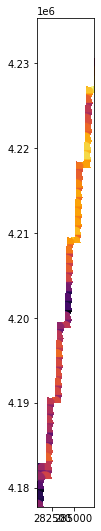

In [115]:
# point-by-point comparison
fig,ax = plt.subplots(figsize=(8,9))
im = ax.imshow(dem,cmap='gist_earth',extent=[xmin,xmax,ymin,ymax])
#im = ax.imshow(dem,cmap='gist_earth',extent=[xmin,xmax,ymin,ymax])
h = big_gdf.plot('h_li',legend=True,ax=ax,cmap='plasma',s=1,vmin=1500, vmax=4000)
#h = big_gdf.plot('h_li',legend=True,ax=ax,cmap='plasma',s=1,vmin=0, vmax=4500)
#ctx.add_basemap(ax=ax)
ax.axis((xmin+100, xmax+100, ymin+100, ymax+100))
ax.set_xticks([])
ax.set_yticks([])
#ax.colorbar(h,label='Elevation [m]')
fig.savefig('Figs/Icesat2_WYwy19_'+MON+'_limits.png', bbox_inches='tight', dpi=600, quality = 90) 

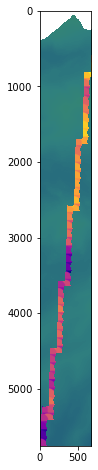

In [6]:
fig,ax = plt.subplots(figsize=(10,8))
im = rio.plot.show(ASOdem, ax=ax,cmap='gist_earth')
i = rio.plot.show(dem, ax=ax,cmap='plasma')
#ax.axis((xmin+100, xmax+100, ymin+100, ymax+100))
#ax.colorbar(dem,label='Elevation [m]')

(0.0, 20000.0, 0.0, 20000.0)

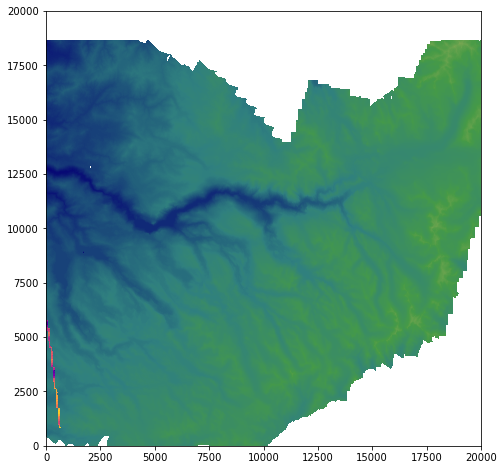

In [14]:
fig,ax = plt.subplots(figsize=(10,8))
im = rio.plot.show(ASOdem, ax=ax,cmap='gist_earth')
i = rio.plot.show(dem, ax=ax,cmap='plasma')
ax.axis((0, 20000, 0, 20000))

In [41]:
ds.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 2,
 'height': 2,
 'count': 6,
 'crs': CRS.from_wkt('GEOGCS["ITRF2014",DATUM["International_Terrestrial_Reference_Frame_2014",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1165"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'),
 'transform': Affine(5.0, 0.0, -124.43,
        0.0, -5.0, 43.24)}

# Get ATL06 data to compare with 

In [5]:
# depedencies
import getpass
from topolib.subsetDat import subsetBBox;
from topolib import IceSat2Data;
import glob
import rasterio
from topolib import gda_lib;
from topolib import dwnldArctic
import numpy as np
import geopandas as gpd
from multiprocessing import Pool

In [6]:
# inputs
datafolderOut = '/home/jovyan/shared/data-aragon/ATL06_CA/'

# Specify the variables of interest
LIce_var = ['atl06_quality_summary','delta_time','h_li','hli_sigma',\
           'latitude','longitude','segment_id','sigma_geo_h']
variables = {
    'beams': [
        '/land_ice_segments/'+LIce_var[0],
        '/land_ice_segments/'+LIce_var[1],
        '/land_ice_segments/'+LIce_var[2],
        '/land_ice_segments/'+LIce_var[3],
        '/land_ice_segments/'+LIce_var[4],
        '/land_ice_segments/'+LIce_var[5],
        '/land_ice_segments/'+LIce_var[6],
        '/land_ice_segments/'+LIce_var[7],
        '/ancillary_data/atlas_sdp_gps_epoch',
    ],
    'other': [
        '/orbit_info/cycle_number',
        '/orbit_info/rgt',
        '/orbit_info/orbit_number',
    ]
}

# Custom time range of interest
# define full_per = 1
full_per = 1
time_range = {
        'start_date': '2019-10-07',
        'end_date': '2019-10-11'
}

# Enter your Earthdata Login user name
user_id = 'nina.aragon7'
# Enter your email address associated with your Earthdata Login account
email = 'aragonch@oregonstate.edu'

In [7]:
# preprocessing
[L,B,R,T] = subsetBBox(raster_path,ds.crs,'epsg:4326') # now read projection from DEM, convert to WGS84
# Area of interest
boundaries = {
    'LowerLeft_Lon': L,
    'LowerLeft_Lat': B,
    'UpperRight_Lon': R,
    'UpperRight_Lat': T,
}
L,B,R,T

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/srv/conda/envs/notebook/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/srv/conda/envs/notebook/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.

(-119.91910216526328,
 37.721153213268956,
 -119.19868268078534,
 38.24106453792272)

In [11]:
# Earthdata Login credentials
password = getpass.getpass('Earthdata Login password: ')

# Setup a search session
search = IceSat2Data(user_id, password, variables=variables)

Earthdata Login password:  ········


In [16]:
# Search for granules in bounding box without download through all datasets
search.search_granules(bounding_box=boundaries)

# Search for granules in bounding box without download for specific time range
search.search_granules(bounding_box=boundaries, time_range=time_range)

Number of granules:
    49
Average size of granules in MB:
    18.22777419187551
Total size in MB:
    893.1609354018999
Number of granules:
    1
Average size of granules in MB:
    7.7674016953
Total size in MB:
    7.7674016953


1

In [17]:
# NOTE: file paths have to be explicitly defined 
# BEFORE submitting 

params = {}
if full_per:
    params['time_range'] = time_range

# Submit a download order to NSIDC with no time restriction
search.order_data(
    email,
    datafolderOut,
    boundaries,
    **params
)

Number of granules:
    1
Average size of granules in MB:
    7.7674016953
Total size in MB:
    7.7674016953
Order:  1
Request HTTP response:  201
order ID:  5000000702002
Data request  1  is submitting...
Initial request status is  processing
Status is not complete. Trying again.
Retry request status is:  complete
Beginning download of zipped output...
Data request 1 is complete.


In [8]:
# glob to list of files
ATL06_list = glob.glob(datafolderOut+'*.h5')
ATL06_list

['/home/jovyan/shared/data-aragon/ATL06_CA/processed_ATL06_20191008182255_01810506_003_01.h5']

In [9]:
# read hdf5 into a geodataframe
dataset_dict={'land_ice_segments':LIce_var, 'land_ice_segments/ground_track':['x_atc']}

In [10]:
## add recursively
ATL06_gdf_list = [gda_lib.ATL06_2_gdf(x,dataset_dict) for x in ATL06_list]
ATL06_gdf_list = [x.to_crs(ds.crs) for x in ATL06_gdf_list]
ATL06_gdf_list;
big_gdf = gda_lib.concat_gdf(ATL06_gdf_list)

/home/jovyan/topohack/topolib/gda_lib.py:33: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(filename) as h5f:
/srv/conda/envs/notebook/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [11]:
big_gdf

,atl06_quality_summary,delta_time,h_li,latitude,longitude,segment_id,sigma_geo_h,pair,beam,p_b,geometry
0,1,5.579451e+07,2745.797607,38.073983,-119.444229,790610.0,12.533924,1.0,0.0,1.0_0.0,POINT (285603.275 4216844.702)
1,1,5.579451e+07,2743.435547,38.073803,-119.444251,790611.0,12.067012,1.0,0.0,1.0_0.0,POINT (285600.792 4216824.810)
2,1,5.579451e+07,2737.395020,38.073624,-119.444274,790612.0,11.913810,1.0,0.0,1.0_0.0,POINT (285598.244 4216804.925)
3,0,5.579451e+07,2734.422607,38.073444,-119.444297,790613.0,10.783306,1.0,0.0,1.0_0.0,POINT (285595.738 4216785.035)
4,0,5.579451e+07,2731.613770,38.073264,-119.444319,790614.0,10.104366,1.0,0.0,1.0_0.0,POINT (285593.239 4216765.145)
...,...,...,...,...,...,...,...,...,...,...,...
1821,1,5.579452e+07,1538.856323,37.722195,-119.561512,792598.0,28.285862,3.0,1.0,3.0_1.0,POINT (274241.268 4178081.520)
1822,1,5.579452e+07,NaN,37.722015,-119.561527,792599.0,20.471485,3.0,1.0,3.0_1.0,POINT (274239.415 4178061.550)
1823,1,5.579452e+07,NaN,37.721834,-119.561537,792600.0,20.099787,3.0,1.0,3.0_1.0,POINT (274237.963 4178041.533)
1824,1,5.579452e+07,NaN,37.721654,-119.561546,792601.0,20.148592,3.0,1.0,3.0_1.0,POINT (274236.614 4178021.501)


ValueError: 'grey' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

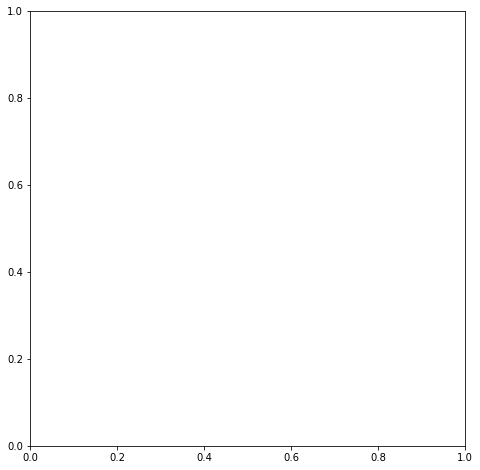

In [13]:
fig,ax = plt.subplots(figsize=(10,8))
im = rio.plot.show(ASOdem, ax=ax,cmap='grey')
#i = rio.plot.show(dem, ax=ax,cmap='gist_earth')
ax.axis((0, 20000, 0, 20000))
#ATL06_gdf_list[1].plot(ax=ax)
for gdf in ATL06_gdf_list:
    gdf.plot(ax=ax)

In [23]:
# separate flight tracks for line-by-line comparison
df1,df2,df3,df4,df5,df6 = [x for x_,x in ATL06_gdf_list[1].groupby(ATL06_gdf_list[1]['p_b'])] #pick 1 ATL06 and seperate it into 6
df_list = [df1,df2,df3,df4,df5,df6]

IndexError: list index out of range

In [ ]:
# comparison of ground data and ATL06 using a 20m buffer sampler
# colors represent the flight lines shown above
df_test_big = gda_lib.buffer_sampler(ds,big_gdf,20,ret_gdf=True)
df_test_big['snow_on_off'] = df_test_big['h_li']-df_test_big['med']

fig,ax = plt.subplots()
for gdf in df_list:
    df_test = gda_lib.buffer_sampler(ds,gdf,20,ret_gdf=True)
    df_test['snow_on_off'] = df_test['h_li']-df_test['med']
    ax.scatter(df_test['latitude'],df_test['snow_on_off'])
    print(df_test['snow_on_off'].mean(),df_test['snow_on_off'].std(),100*df_test['snow_on_off'].mean()/(df_test['h_li'].max()-df_test['h_li'].min()))
# df_test['snow_on_off'].hist(bins=30)
# ax.scatter(df_test['latitude'],df_test['snow_on_off'])

big_gdf['diff'] = df_test_big['snow_on_off']

In [ ]:
# point-by-point comparison
fig,ax = plt.subplots(figsize=(5,6))
im = ax.imshow(dem,cmap='inferno',extent=[xmin,xmax,ymin,ymax])
big_gdf.plot('h_li',legend=True,ax=ax,cmap='inferno',s=1)

In [ ]:
# sample data along same ground tracks
df_test_big_slp = gda_lib.buffer_sampler(ds2,big_gdf,20,ret_gdf=True)
good_idx = df_test_big['atl06_quality_summary']==0
df_test_big = df_test_big.loc[good_idx]

df_test_big_asp = gda_lib.buffer_sampler(ds3,big_gdf,20,ret_gdf=True)

In [ ]:
df_test_big_slp = df_test_big_slp.loc[good_idx]
fig,ax = plt.subplots()
ax.scatter(df_test_big_slp['med'],df_test_big['snow_on_off'],\
          c=abs(df_test_big['snow_on_off']),vmin=-7,vmax=7)
plt.ylim(-25,25)
plt.ylabel('Error [m]')
plt.xlabel('Slope [deg]')